# ***Importing Dependencies***

Importing thigns so we can use TensorFlow lib in our code

In [ ]:
#Install TensorFlow in our Machine
!pip install tensorFlow

# Imports

In [ ]:
#importing tensforflow lib
import tensorflow as tf
#importing numpy
import numpy as np
#MatPlot lib
import matplotlib.pyplot as plt
#math lib import
import math

# Generating Data

Simulate data to use in our model, in a real world project we hava to collect some data from sensor(just like we did in the lab ) and then use it.

[1.64634959e+00 9.97040802e-01 1.74752046e+00 2.88597312e+00
 2.01690588e+00 3.25715815e+00 1.64583594e+00 6.13292472e+00
 4.60440963e+00 7.24289327e-01 2.42703784e+00 3.94898938e+00
 7.85762125e-01 6.17981814e+00 2.78486398e+00 4.96094137e+00
 4.98959417e+00 2.26987340e+00 2.61445816e+00 3.67100209e+00
 4.77630012e+00 1.18003501e+00 1.81060759e+00 4.21110928e+00
 3.13938261e+00 1.12198009e+00 2.59584335e+00 1.25158058e+00
 3.34076588e+00 5.22993937e+00 1.16396602e+00 6.01526541e+00
 2.67295917e+00 3.16676962e+00 3.20738355e+00 9.92206205e-02
 4.59734429e+00 6.24111963e+00 1.02338972e+00 7.95669787e-01
 2.35515264e+00 4.35562623e+00 1.82277101e-02 2.31993462e+00
 3.68693076e-01 4.95954489e+00 2.19766478e+00 4.41408671e+00
 3.08648332e+00 6.11273713e+00 5.25254110e+00 3.83423424e+00
 3.54697736e+00 6.26678081e+00 1.60047895e+00 9.03387400e-02
 5.59486658e-01 5.89980168e+00 6.11642580e+00 3.08806953e+00
 2.14216389e+00 4.54184836e+00 6.84663772e-02 4.77492664e+00
 4.21854812e+00 1.196604

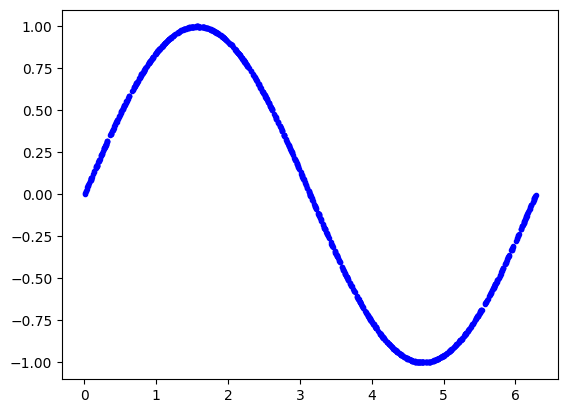

In [ ]:
#Generate many Sample dataPoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337

np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size= SAMPLES)
print(x_values)
print(x_values.size)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

## Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values,'b.')
plt.show()

#Adding some Noise

One of the
exciting things about deep learning networks is their ability to sift patterns from
noise. This allows them to make predictions even when trained on messy, real-world
data, a real world situation it will work just like that. To show this off, let’s add some random noise to our datapoints and draw
another graph:


In [ ]:
# Add a small random number to each y value
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(len(y_values))

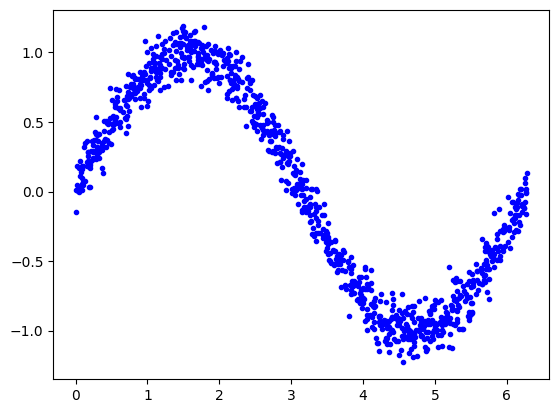

In [ ]:
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

#Splitting the Data

a dataset is split into three parts


*   training
*   validation
*   test

in this example we weill use 20% for validation, 20 % for testing and the rest to train the model.





600
800


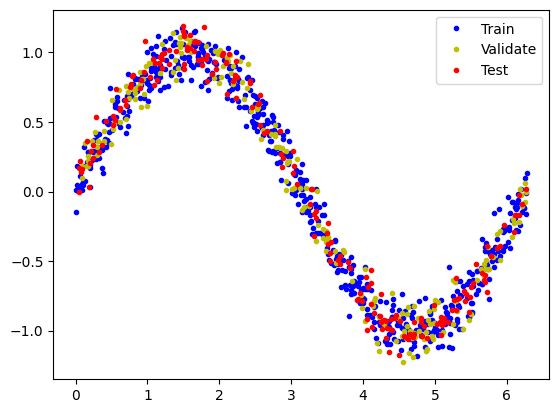

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.

# take 60% for training
TRAIN_SPLIT = int(0.6 * SAMPLES)
print(TRAIN_SPLIT)

# take the 20% for testing
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
print(TEST_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

#Defining a Basic Model

We’re going to build a model that will take an input value (in this case, x ) and use it to
predict a numeric output value (the sine of x ). This type of problem is called a
regression

The code to do this is actually quite straightforward. It uses Keras, TensorFlow’s high-
level API for creating deep learning networks:

In [ ]:
# We'll use Keras to create a simple model architect
import tensorflow as tf
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()


# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

#Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training Our Model

To train a model in Keras we just call its fit() method, passing all of our data and
some other important arguments. The code in the next cell shows how:

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 13ms/step - loss: 0.7506 - mae: 0.7658 - val_loss: 0.5646 - val_mae: 0.6741
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.4692 - mae: 0.6055 - val_loss: 0.4623 - val_mae: 0.5931
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4156 - mae: 0.5584 - val_loss: 0.4246 - val_mae: 0.5702
Epoch 4/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3840 - mae: 0.5376 - val_loss: 0.3911 - val_mae: 0.5428
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3547 - mae: 0.5179 - val_loss: 0.3591 - val_mae: 0.5158
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3258 - mae: 0.4962 - val_loss: 0.3328 - val_mae: 0.4934
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.3010 - mae: 0.4762 - val_loss: 0.3099 - val_mae: 0.4801
Epoch 8/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

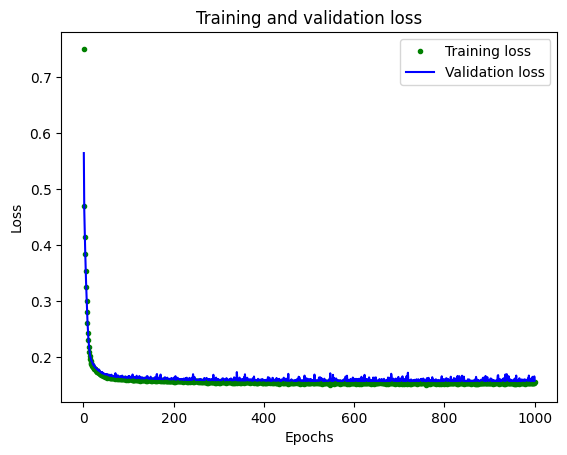

In [ ]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

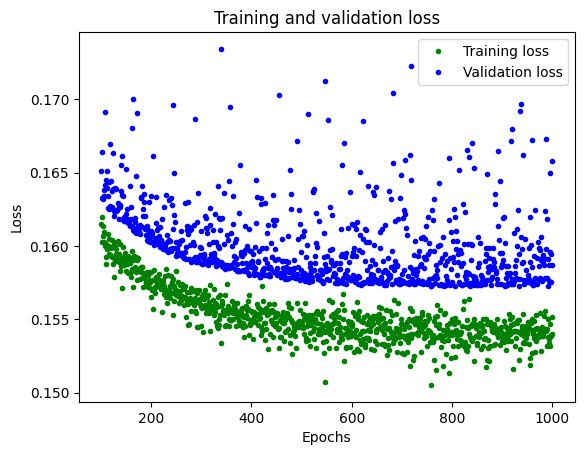

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

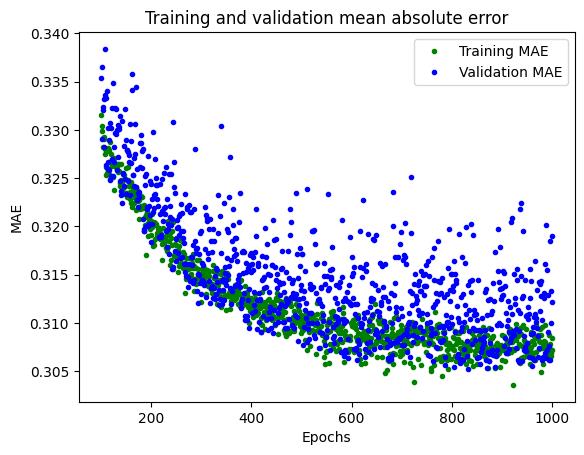

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 2ms/step


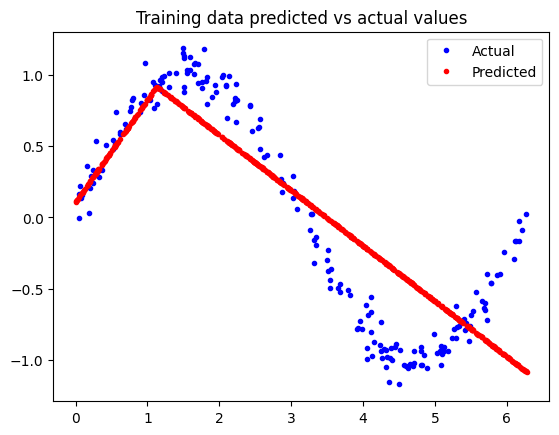

In [ ]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#Improving Our Model

In [ ]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary ofthe model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                32        
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 7ms/step - loss: 0.6414 - mae: 0.7141 - val_loss: 0.5344 - val_mae: 0.6521
Epoch 2/600
38/38 [==============================] - 0s 3ms/step - loss: 0.4497 - mae: 0.5939 - val_loss: 0.4368 - val_mae: 0.5798
Epoch 3/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3817 - mae: 0.5384 - val_loss: 0.3803 - val_mae: 0.5364
Epoch 4/600
38/38 [==============================] - 0s 3ms/step - loss: 0.3359 - mae: 0.5026 - val_loss: 0.3333 - val_mae: 0.4976
Epoch 5/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2915 - mae: 0.4694 - val_loss: 0.2831 - val_mae: 0.4542
Epoch 6/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2490 - mae: 0.4347 - val_loss: 0.2447 - val_mae: 0.4220
Epoch 7/600
38/38 [==============================] - 0s 3ms/step - loss: 0.2146 - mae: 0.4052 - val_loss: 0.2102 - val_mae: 0.3973
Epoch 8/600
38/38 [==============================] - 0s 3ms/step - loss: 0.1878 - m

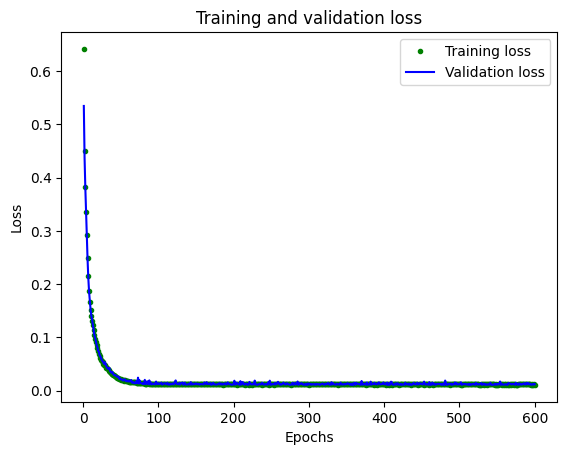

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

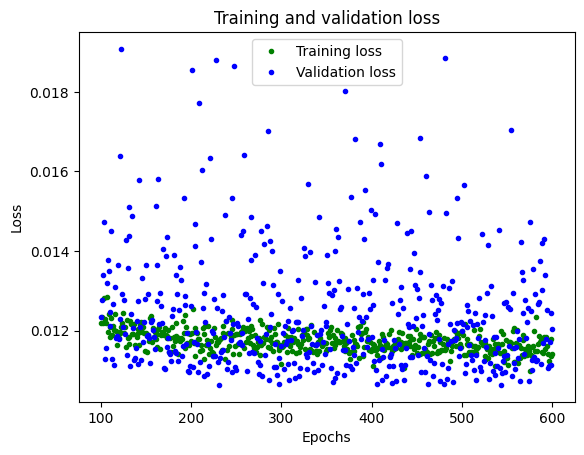

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 3ms/step


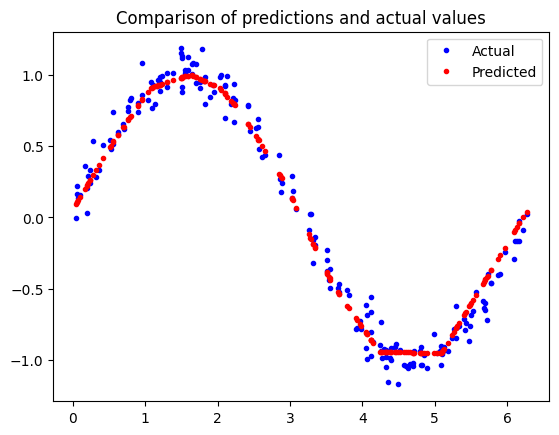

In [ ]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

#Converting the Model for TensorFlow Lite

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
  # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

###Run the following cell to make predictions with both models and plot them on a graph, alongside the results from our original, unconverted model:

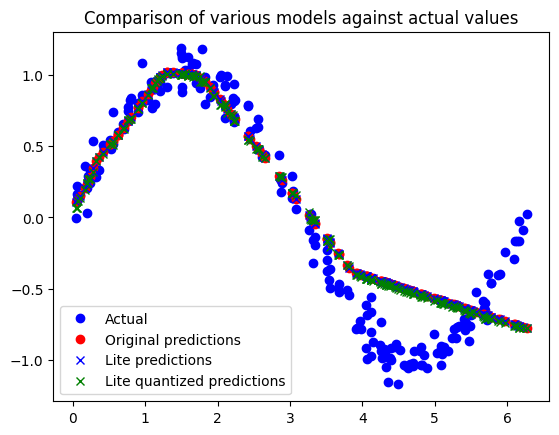

In [ ]:
# Supondo que 'x_test' é uma lista ou array de valores de entrada para teste
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]

# Correção aqui: Remova a quebra de linha e o espaço extra
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
    # Create a 2D tensor wrapping the current x value
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
    # Write the value to the input tensor
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    # Run inference
    sine_model.invoke()
    # Read the prediction from the output tensor
    sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
    # Do the same for the quantized model
    sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
    sine_model_quantized.invoke()
    sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', \
label='Lite quantized predictions')
plt.legend()
plt.show()